## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Carga datos y representa la serie

In [4]:
df = pd.read_csv("data/AirPassengers.csv")
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.describe()

,value
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    144 non-null    datetime64[ns]
 1   value   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
pd.date_range(df['date'].min(), df['date'].max(), freq="MS")

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

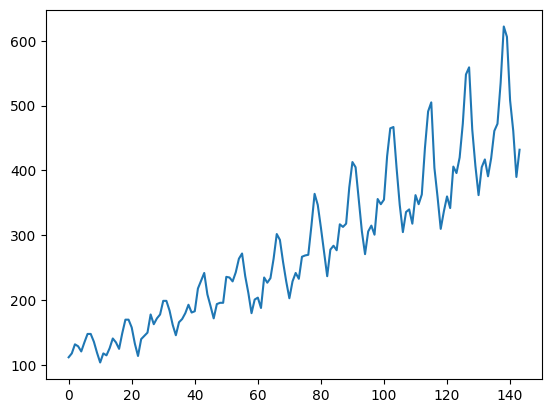

In [10]:
plt.plot(df['value'])

In [11]:
df.set_index('date', inplace= True)

In [12]:
df

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Figure size 1500x1000 with 0 Axes>

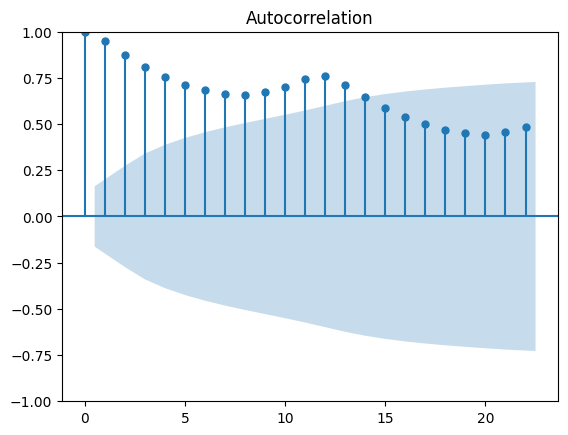

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(15,10))
plot_acf(df['value']);

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window comparando el valor de seasonality obtenido en el apartado anterior

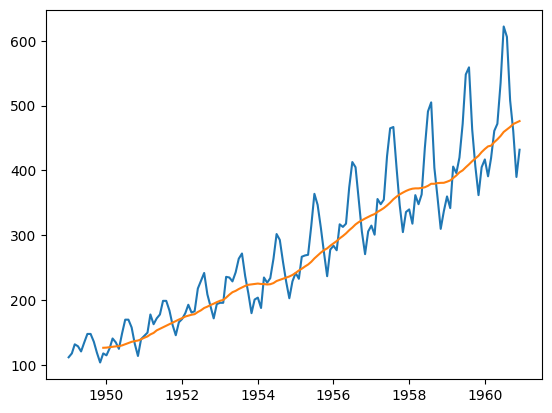

In [22]:
plt.plot(df)
plt.plot(df.rolling(12).mean());

In [18]:
df.rolling(12).mean().head(20)

,value
date,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


## 3. Comprueba de manera estadística si la serie es o no stationary.

In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['value'].values)
result[1]

0.991880243437641

## 4. Aplica una transformación logarítmica

In [24]:
df['value_log'] = np.log(df['value'])

In [27]:
df['value_log']

date
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: value_log, Length: 144, dtype: float64

## 5. Divide en train y test. Guarda 20 muestras para test.

In [28]:
train = df['value_log'][:len(df) - 20]

In [30]:
len(df)

144

In [29]:
train

date
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1958-12-01    5.820083
1959-01-01    5.886104
1959-02-01    5.834811
1959-03-01    6.006353
1959-04-01    5.981414
Name: value_log, Length: 124, dtype: float64

In [31]:
test = df['value_log'][len(df) - 20:]

In [32]:
test

date
1959-05-01    6.040255
1959-06-01    6.156979
1959-07-01    6.306275
1959-08-01    6.326149
1959-09-01    6.137727
1959-10-01    6.008813
1959-11-01    5.891644
1959-12-01    6.003887
1960-01-01    6.033086
1960-02-01    5.968708
1960-03-01    6.037871
1960-04-01    6.133398
1960-05-01    6.156979
1960-06-01    6.282267
1960-07-01    6.432940
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: value_log, dtype: float64

## 6. Crea tu primer modelo ARIMA

In [33]:
from pmdarima.arima import auto_arima

In [40]:
model = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   trace= True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-208.997, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-201.351, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-202.849, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-204.251, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-202.180, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-204.379, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-210.045, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-205.471, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-204.015, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-215.312, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-205.303, T

In [35]:
predictions = model.predict(20)

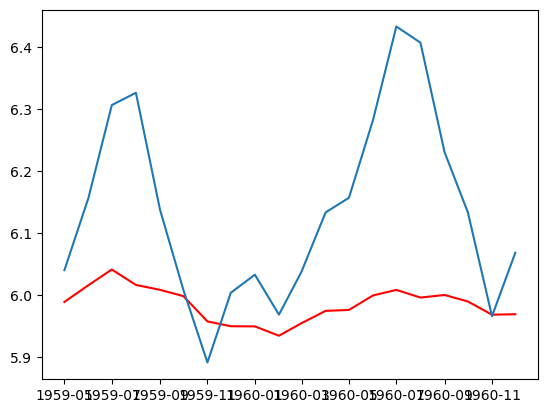

In [36]:
plt.plot(predictions, 'r')
plt.plot(test);

In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
mean_absolute_error(test, predictions)

0.15789379083568794

In [41]:
model = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_p = 5,
                   max_q = 5,
                   m = 12,
                   max_d = 3,
                   trace= True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-409.514, Time=0.95 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-290.649, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-399.417, Time=0.51 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-353.179, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-125.472, Time=0.03 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-411.631, Time=0.62 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-384.170, Time=0.15 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-409.714, Time=1.83 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-405.268, Time=1.05 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-408.031, Time=1.80 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-408.087, Time=0.44 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=-410.729, Time=0.85 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-409.957, Time=1.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-300.825, Time=0.19 sec
 ARIMA(0,0,2)(0,1,1

In [42]:
predictions = model.predict(20)

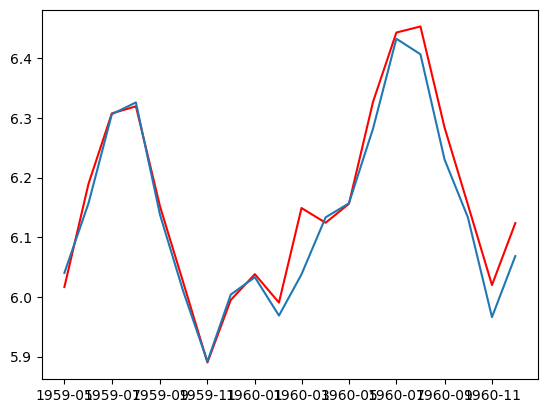

In [43]:
plt.plot(predictions, 'r')
plt.plot(test);

## 7. Representa en una gráfica los datos de test y tus predicciones.

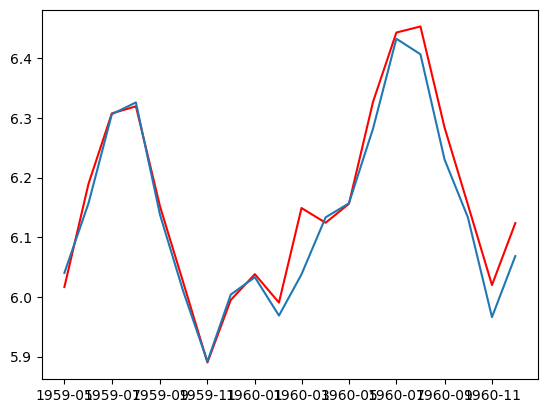

In [44]:
plt.plot(predictions, 'r')
plt.plot(test);

## 8. Prueba otros modelos, a ver qué performance presentan.

In [52]:
for i in range(12, 0, -1):
    df['t-' + str(i)] = df['value_log'].shift(i)

In [54]:
df.dropna(inplace=True)

In [55]:
df

,value,value_log,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,,
1950-01-01,115,4.744932,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950-02-01,126,4.836282,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932
1950-03-01,141,4.948760,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282
1950-04-01,135,4.905275,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760
1950-05-01,125,4.828314,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760,4.905275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,6.406880,6.326149,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940
1960-09-01,508,6.230481,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880
1960-10-01,461,6.133398,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880,6.230481


In [56]:
df.columns.get_loc('t-12')

2

In [60]:
X = df.iloc[:, 2::]

In [61]:
X

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,
1950-01-01,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950-02-01,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932
1950-03-01,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282
1950-04-01,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760
1950-05-01,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760,4.905275
...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,6.326149,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940
1960-09-01,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880
1960-10-01,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880,6.230481


In [62]:
Y = df['value_log']

In [63]:
X

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,
1950-01-01,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950-02-01,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932
1950-03-01,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282
1950-04-01,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760
1950-05-01,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760,4.905275
...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,6.326149,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940
1960-09-01,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880
1960-10-01,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880,6.230481


In [64]:
Y

date
1950-01-01    4.744932
1950-02-01    4.836282
1950-03-01    4.948760
1950-04-01    4.905275
1950-05-01    4.828314
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: value_log, Length: 132, dtype: float64

In [67]:
X_train = X.iloc[:112, :]

In [72]:
Y

date
1950-01-01    4.744932
1950-02-01    4.836282
1950-03-01    4.948760
1950-04-01    4.905275
1950-05-01    4.828314
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: value_log, Length: 132, dtype: float64

In [73]:
Y_train = Y[:112]

In [74]:
Y_train

date
1950-01-01    4.744932
1950-02-01    4.836282
1950-03-01    4.948760
1950-04-01    4.905275
1950-05-01    4.828314
                ...   
1958-12-01    5.820083
1959-01-01    5.886104
1959-02-01    5.834811
1959-03-01    6.006353
1959-04-01    5.981414
Name: value_log, Length: 112, dtype: float64

In [68]:
X_train

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,
1950-01-01,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950-02-01,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932
1950-03-01,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282
1950-04-01,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760
1950-05-01,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760,4.905275
...,...,...,...,...,...,...,...,...,...,...,...,...
1958-12-01,5.817111,5.828946,5.762051,5.891644,5.852202,5.894403,6.075346,6.196444,6.224558,6.001415,5.883322,5.736572
1959-01-01,5.828946,5.762051,5.891644,5.852202,5.894403,6.075346,6.196444,6.224558,6.001415,5.883322,5.736572,5.820083
1959-02-01,5.762051,5.891644,5.852202,5.894403,6.075346,6.196444,6.224558,6.001415,5.883322,5.736572,5.820083,5.886104


In [75]:
X_test =  X.iloc[112:, :]

In [76]:
Y_test = Y[112:]

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
model_ranfor = RandomForestRegressor(max_depth=5)

In [79]:
model_ranfor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5)

In [80]:
predictions = model_ranfor.predict(X_test)

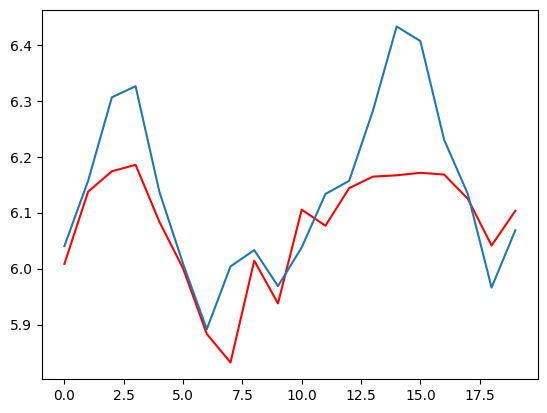

In [82]:
plt.plot(predictions, 'r')
plt.plot(Y_test.values);

In [84]:
real_prediction = np.exp(predictions)

In [85]:
real_prediction

array([406.79617206, 462.90729861, 480.11168347, 485.69801359,
       438.74009755, 403.59909353, 358.94454105, 341.08824121,
       409.20171422, 379.06538498, 448.27607008, 435.59462322,
       465.86557925, 475.53388807, 476.6699701 , 478.80417196,
       477.32676435, 457.04691264, 420.4202227 , 447.31583739])

In [88]:
df

,value,value_log,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,,
1950-01-01,115,4.744932,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950-02-01,126,4.836282,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932
1950-03-01,141,4.948760,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282
1950-04-01,135,4.905275,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760
1950-05-01,125,4.828314,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760,4.905275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,6.406880,6.326149,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940
1960-09-01,508,6.230481,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880
1960-10-01,461,6.133398,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880,6.230481
